In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error 
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

C:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
ip = pd.read_csv(open(r"C:\Users\Administrator\Desktop\fda\SVR\AAPL历史数据.csv"))

In [3]:
ip

,日期,收盘,开盘,高,低,交易量,涨跌幅
0,2000年1月3日,1.00,0.94,1.00,0.91,535.82M,8.70%
1,2000年1月4日,0.92,0.97,0.99,0.90,511.73M,-8.00%
2,2000年1月5日,0.93,0.93,0.99,0.92,778.32M,1.09%
3,2000年1月6日,0.85,0.95,0.96,0.85,767.98M,-8.60%
4,2000年1月7日,0.89,0.86,0.90,0.85,460.73M,4.71%
5,2000年1月10日,0.87,0.91,0.91,0.85,505.06M,-2.25%
6,2000年1月11日,0.83,0.86,0.89,0.81,441.49M,-4.60%
7,2000年1月12日,0.78,0.85,0.85,0.77,976.07M,-6.02%
8,2000年1月13日,0.86,0.84,0.88,0.83,1.03B,10.26%
9,2000年1月14日,0.90,0.89,0.91,0.89,390.38M,4.65%


In [4]:
y=ip['收盘']
X=ip.drop('收盘',axis=1).drop('日期',axis=1).drop('交易量',axis=1).drop('涨跌幅',axis=1)

In [5]:
"""
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
print(scaler.fit(X))
X=scaler.transform(X)
"""

'\nfrom sklearn.preprocessing import MinMaxScaler\nscaler=MinMaxScaler()\nprint(scaler.fit(X))\nX=scaler.transform(X)\n'

In [6]:
X

,开盘,高,低
0,0.94,1.00,0.91
1,0.97,0.99,0.90
2,0.93,0.99,0.92
3,0.95,0.96,0.85
4,0.86,0.90,0.85
5,0.91,0.91,0.85
6,0.86,0.89,0.81
7,0.85,0.85,0.77
8,0.84,0.88,0.83
9,0.89,0.91,0.89


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10,random_state=99)

In [8]:
target = y_train

In [9]:
NN_model = Sequential()

# The Input Layer :
NN_model.add(Dense(2, kernel_initializer='normal',input_dim = X_train.shape[1], activation='relu'))

# The Hidden Layers :
NN_model.add(Dense(3, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(2, kernel_initializer='normal',activation='relu'))


# The Output Layer :
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

# Compile the network :
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 8         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 8         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 28
Trainable params: 28
Non-trainable params: 0
_________________________________________________________________


In [10]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [11]:
NN_model.fit(X_train, target, epochs=100, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Epoch 1/100
103/113 [==========================>...] - ETA: 0s - loss: 14.3569 - mean_absolute_error: 14.3569
Epoch 00001: val_loss improved from inf to 14.48072, saving model to Weights-001--14.48072.hdf5
113/113 [==============================] - 0s 3ms/step - loss: 14.3995 - mean_absolute_error: 14.3995 - val_loss: 14.4807 - val_mean_absolute_error: 14.4807
Epoch 2/100
 91/113 [=======================>......] - ETA: 0s - loss: 13.8734 - mean_absolute_error: 13.8734
Epoch 00002: val_loss improved from 14.48072 to 12.38350, saving model to Weights-002--12.38350.hdf5
113/113 [==============================] - 0s 2ms/step - loss: 13.5449 - mean_absolute_error: 13.5449 - val_loss: 12.3835 - val_mean_absolute_error: 12.3835
Epoch 3/100
112/113 [============================>.] - ETA: 0s - loss: 8.4665 - mean_absolute_error: 8.4665  
Epoch 00003: val_loss improved from 12.38350 to 2.78189, saving model to Weights-003--2.78189.hdf5
113/113 [==============================] - 0s 1ms/step - los

Epoch 26/100
105/113 [==========================>...] - ETA: 0s - loss: 0.1035 - mean_absolute_error: 0.1035
Epoch 00026: val_loss did not improve from 0.10098
113/113 [==============================] - 0s 2ms/step - loss: 0.1034 - mean_absolute_error: 0.1034 - val_loss: 0.1018 - val_mean_absolute_error: 0.1018
Epoch 27/100
 97/113 [========================>.....] - ETA: 0s - loss: 0.1024 - mean_absolute_error: 0.1024
Epoch 00027: val_loss improved from 0.10098 to 0.10085, saving model to Weights-027--0.10085.hdf5
113/113 [==============================] - 0s 2ms/step - loss: 0.1014 - mean_absolute_error: 0.1014 - val_loss: 0.1008 - val_mean_absolute_error: 0.1008
Epoch 28/100
 95/113 [========================>.....] - ETA: 0s - loss: 0.1035 - mean_absolute_error: 0.1035
Epoch 00028: val_loss did not improve from 0.10085
113/113 [==============================] - 0s 1ms/step - loss: 0.1025 - mean_absolute_error: 0.1025 - val_loss: 0.1073 - val_mean_absolute_error: 0.1073
Epoch 29/100
1

Epoch 52/100
105/113 [==========================>...] - ETA: 0s - loss: 0.1014 - mean_absolute_error: 0.1014
Epoch 00052: val_loss did not improve from 0.10039
113/113 [==============================] - 0s 1ms/step - loss: 0.1021 - mean_absolute_error: 0.1021 - val_loss: 0.1011 - val_mean_absolute_error: 0.1011
Epoch 53/100
 60/113 [==============>...............] - ETA: 0s - loss: 0.1045 - mean_absolute_error: 0.1045
Epoch 00053: val_loss did not improve from 0.10039
113/113 [==============================] - 0s 1ms/step - loss: 0.1001 - mean_absolute_error: 0.1001 - val_loss: 0.1020 - val_mean_absolute_error: 0.1020
Epoch 54/100
109/113 [===========================>..] - ETA: 0s - loss: 0.1028 - mean_absolute_error: 0.1028
Epoch 00054: val_loss did not improve from 0.10039
113/113 [==============================] - 0s 1ms/step - loss: 0.1024 - mean_absolute_error: 0.1024 - val_loss: 0.1013 - val_mean_absolute_error: 0.1013
Epoch 55/100
113/113 [==============================] - ETA: 

Epoch 78/100
109/113 [===========================>..] - ETA: 0s - loss: 0.0999 - mean_absolute_error: 0.0999
Epoch 00078: val_loss did not improve from 0.09993
113/113 [==============================] - 0s 1ms/step - loss: 0.1001 - mean_absolute_error: 0.1001 - val_loss: 0.1004 - val_mean_absolute_error: 0.1004
Epoch 79/100
 60/113 [==============>...............] - ETA: 0s - loss: 0.0979 - mean_absolute_error: 0.0979
Epoch 00079: val_loss did not improve from 0.09993
113/113 [==============================] - 0s 1ms/step - loss: 0.1001 - mean_absolute_error: 0.1001 - val_loss: 0.1004 - val_mean_absolute_error: 0.1004
Epoch 80/100
111/113 [============================>.] - ETA: 0s - loss: 0.0981 - mean_absolute_error: 0.0981
Epoch 00080: val_loss improved from 0.09993 to 0.09992, saving model to Weights-080--0.09992.hdf5
113/113 [==============================] - 0s 1ms/step - loss: 0.0987 - mean_absolute_error: 0.0987 - val_loss: 0.0999 - val_mean_absolute_error: 0.0999
Epoch 81/100
 

In [12]:
pred=NN_model.predict(X_test)

In [13]:
pred

array([[ 0.41785526],
       [ 0.26766458],
       [ 8.531363  ],
       [19.349815  ],
       [19.453598  ],
       [ 0.39416438],
       [28.11142   ],
       [29.198038  ],
       [28.814787  ],
       [ 3.8825471 ],
       [28.985657  ],
       [ 0.37098318],
       [27.411879  ],
       [ 7.1724234 ],
       [13.9093275 ],
       [29.051563  ],
       [19.346685  ],
       [ 0.40437838],
       [26.878244  ],
       [13.182486  ],
       [ 0.7182007 ],
       [ 0.9784597 ],
       [ 0.9552785 ],
       [39.2651    ],
       [13.966135  ],
       [21.222141  ],
       [ 3.040912  ],
       [ 4.440587  ],
       [ 0.3944013 ],
       [35.490925  ],
       [ 1.0620613 ],
       [ 0.34433782],
       [16.265009  ],
       [ 0.26084337],
       [23.999653  ],
       [42.803577  ],
       [ 9.391981  ],
       [ 0.38438863],
       [ 0.3910086 ],
       [ 0.2542592 ],
       [ 0.32774088],
       [ 5.794247  ],
       [ 1.3189634 ],
       [15.627844  ],
       [ 7.009395  ],
       [51

In [14]:
test_set_rmse=(np.sqrt(mean_squared_error(y_test,pred)))
test_set_r2=r2_score(y_test,pred)
test_set_mae=mean_absolute_error(y_test,pred)
print(test_set_rmse)
print(test_set_r2)
print(test_set_mae)

0.17514613752391567
0.9998739909660177
0.0933464424014091


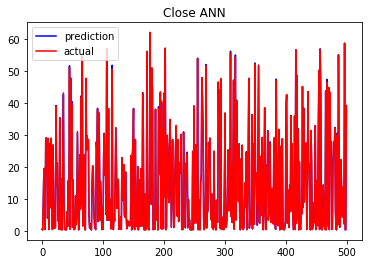

In [15]:
x=np.arange(0,500)
plt.title('Close ANN')
plt.plot(x,pred,'b-',label='prediction')
plt.plot(x,y_test,'r-',label='actual')
plt.legend()
plt.show()

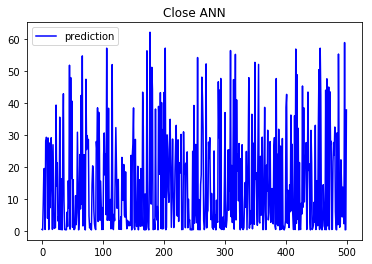

In [16]:
x=np.arange(0,500)
plt.title('Close ANN')
plt.plot(x,pred,'b-',label='prediction')
plt.legend()
plt.show()

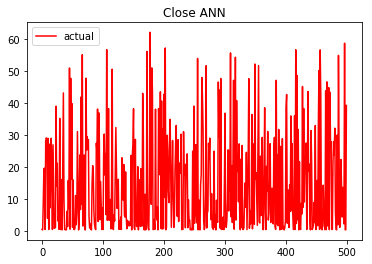

In [17]:
x=np.arange(0,500)
plt.title('Close ANN')
plt.plot(x,y_test,'r-',label='actual')
plt.legend()
plt.show()

# 计算收益

In [18]:
X_test = X_test.as_matrix()
y_test = y_test.as_matrix()
print(type(X_test))
print(type(y_test))
len1 = len(pred)

print(type(X_test))
profit = 0
for i in range(len1):
    if(pred[i] > X_test[i][0] ):
        profit += y_test[i] - X_test[i][0]
print("每股收益为：")
profit



<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
每股收益为：


27.74999999999997

 减少层数后效果果然好了一些